In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers

  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.9.0
    Uninstalling fsspec-0.9.0:
      Successfully uninstalled fsspec-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install tensorflow --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl (276.5 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached grpcio-1.59.2-cp38-cp38-win_amd64.whl (3.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using

In [6]:
pip install --upgrade numpy --user

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install --upgrade h5py --user

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [32]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)


Current working directory: C:\Users\Dhoot\Downloads\Kaggle


In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

# Set up visualization preferences
plt.rcParams['font.size'] = 12
sns.set_style("dark")
warnings.filterwarnings('ignore')



C:\Users\Dhoot\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [39]:
image_path = 'C:\\Users\\Dhoot\\Downloads\\Kaggle\\IMAGE8K\\Images\\'

In [40]:
# Load the data
data = pd.read_csv("caption.csv")
data.head()
data.columns = data.iloc[0]
data = data[1:]
data = data.reset_index(drop=True)

In [25]:
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [41]:

# Function to read and preprocess images
def read_image(path, img_size=224):
    # Load the image from the specified path, ensuring it's in RGB color mode and resized to the target size.
    img = load_img(path, color_mode='rgb', target_size=(img_size, img_size))
    # Convert the loaded image to a NumPy array.
    img = img_to_array(img)
    # Normalize the pixel values of the image to be in the range [0, 1].
    img = img/255.
    # Return the preprocessed image.
    return img

# Function to display images
def display_images(temp_df):
    # Reset the index of the input DataFrame and assign it to a new variable.
    temp_df = temp_df.reset_index(drop=True)
    # Create a new figure for plotting images with a specified size.
    plt.figure(figsize=(20, 20))
    n = 0
    # Loop through a range of 15 (assuming you want to display 15 images).
    for i in range(15):
        n += 1
        # Create a subplot within the figure grid.
        plt.subplot(5, 5, n)
        # Adjust the spacing between subplots both vertically and horizontally.
        plt.subplots_adjust(hspace=0.7, wspace=0.3)
        # Load and preprocess the image from the specified path.
        image = read_image(f"C:\\Users\\Dhoot\\Downloads\\Kaggle\\IMAGE8K\\Images\\{temp_df.image[i]}")
        # Display the image in the current subplot.
        plt.imshow(image)
        # Set the title of the subplot, wrapping the caption text to fit within 20 characters per line.
        plt.title("\n".join(wrap(temp_df.caption[i], 20)))
        # Turn off the axis labels and ticks for the subplot.
        plt.axis("off")

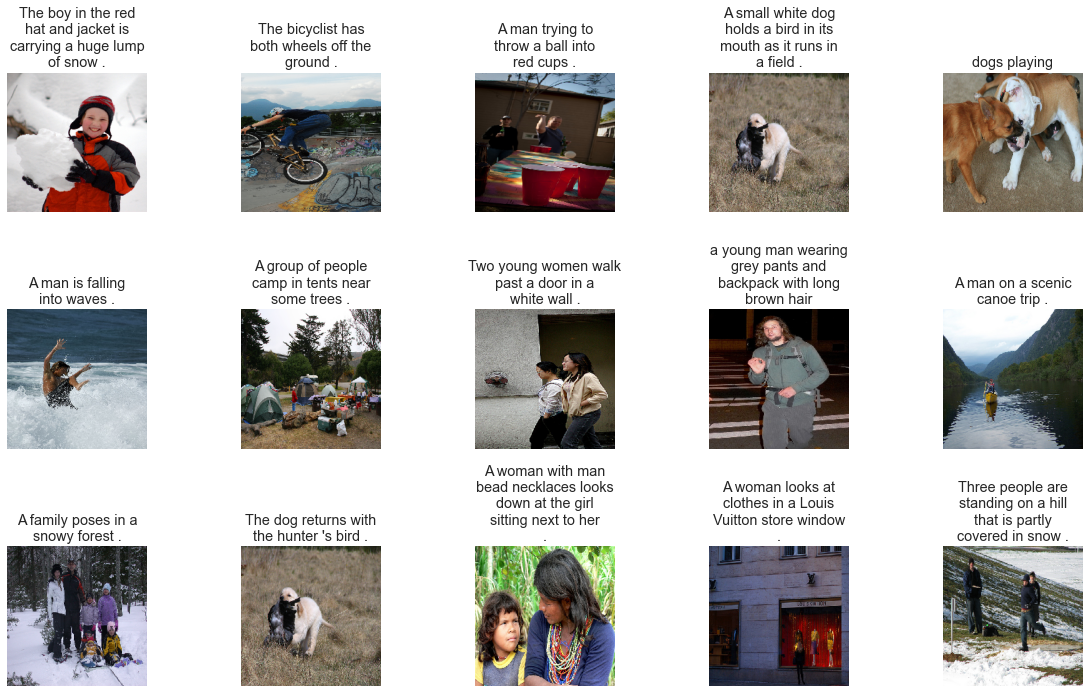

In [42]:
display_images(data.sample(15))

In [43]:
# Function to preprocess text data
def text_preprocessing(data):
    # Convert all captions to lowercase.
    data['caption'] = data['caption'].apply(lambda x: x.lower())
    # Remove characters that are not alphabetic (A-Z, a-z).
    data['caption'] = data['caption'].apply(lambda x: x.replace("[^A-Za-z]", ""))
    # Replace consecutive whitespace characters with a single space.
    data['caption'] = data['caption'].apply(lambda x: x.replace("\s+", " "))
    # Remove words with a length less than or equal to 1 character.
    data['caption'] = data['caption'].apply(lambda x: " ".join([word for word in x.split() if len(word) > 1]))
    # Add special tokens "startseq" at the beginning and "endseq" at the end of each caption.
    data['caption'] = "startseq " + data['caption'] + " endseq"
    # Return the preprocessed data.
    return data

In [44]:
data = text_preprocessing(data)
captions = data['caption'].tolist()
captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [45]:
# Tokenize captions
tokenizer = Tokenizer()

# Fit the tokenizer on the list of captions to build a vocabulary.
tokenizer.fit_on_texts(captions)

# Determine the vocabulary size, which is the number of unique words in the captions.
vocab_size = len(tokenizer.word_index) + 1

# Find the maximum length among all captions, which helps in padding sequences.
max_length = max(len(caption.split()) for caption in captions)

# Get unique image names
images = data['image'].unique().tolist()
n_images = len(images)

# Split data into training and validation sets
split_index = round(0.85 * n_images)
train_images = images[:split_index]
val_images = images[split_index:]

train = data[data['image'].isin(train_images)]
test = data[data['image'].isin(val_images)]

train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

# Tokenize a sample caption
tokenizer.texts_to_sequences([captions[1]])[0]

[1, 18, 312, 63, 196, 119, 2]

In [46]:
# Load a pre-trained image model (DenseNet201)
model = DenseNet201()

# Create a feature extraction model by specifying the input and output layers
fe = Model(inputs=model.input, outputs=model.layers[-2].output)

# Set the target image size for preprocessing
img_size = 224

# Initialize an empty dictionary to store image features
features = {}

# Iterate through unique image names in the dataset
for image in tqdm(data['image'].unique().tolist()):
    # Load and preprocess the image, ensuring it's resized to the target size and normalized
    img = load_img(os.path.join(image_path, image), target_size=(img_size, img_size))
    img = img_to_array(img)
    img = img/255.
    img = np.expand_dims(img, axis=0)
    
    # Extract image features using the pre-trained model
    feature = fe.predict(img, verbose=0)
    
    # Store the image features in the dictionary with the image name as the key
    features[image] = feature

100%|████████████████████████████████████████████████████████████████████████████| 8091/8091 [5:25:56<00:00,  2.42s/it]


In [47]:
# Custom data generator for training and validation
class CustomDataGenerator(Sequence):
    
    def __init__(self, df, x_col, y_col, batch_size, directory, tokenizer, 
                 vocab_size, max_length, features, shuffle=True):
        # Initialize the generator with provided parameters and data.
        self.df = df.copy()
        self.x_col = x_col  # Column containing image file paths
        self.y_col = y_col  # Column containing captions
        self.directory = directory  # Directory where images are located
        self.batch_size = batch_size  # Batch size for data generation
        self.tokenizer = tokenizer  # Text tokenizer
        self.vocab_size = vocab_size  # Size of the vocabulary
        self.max_length = max_length  # Maximum length of captions
        self.features = features  # Precomputed image features
        self.shuffle = shuffle  # Whether to shuffle the data
        self.n = len(self.df)  # Total number of data points
        
    def on_epoch_end(self):
        if self.shuffle:
            # Shuffle the data at the end of each epoch.
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __len__(self):
        # Calculate the number of batches in an epoch.
        return self.n // self.batch_size
    
    def __getitem__(self, index):
        # Get the data for a specific batch.
        batch = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size, :]
        x1, x2, y = self.__get_data(batch)        
        return (x1, x2), y
    
    def __get_data(self, batch):
        # Generate data for a given batch.
        x1, x2, y = list(), list(), list()
        
        images = batch[self.x_col].tolist()
           
        for image in images:
            feature = self.features[image][0]  # Extract image features
            
            captions = batch.loc[batch[self.x_col] == image, self.y_col].tolist()
            for caption in captions:
                seq = self.tokenizer.texts_to_sequences([caption])[0]  # Tokenize the caption

                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=self.max_length)[0]  # Pad input sequence
                    out_seq = to_categorical([out_seq], num_classes=self.vocab_size)[0]  # Convert output to one-hot encoding
                    x1.append(feature)  # Image features
                    x2.append(in_seq)  # Input sequence
                    y.append(out_seq)  # Target sequence
            
        x1, x2, y = np.array(x1), np.array(x2), np.array(y)
                
        return x1, x2, y


In [48]:

# Define input layers
input1 = Input(shape=(1920,))
input2 = Input(shape=(max_length,))

# Image feature processing
img_features = Dense(256, activation='relu')(input1)
img_features_reshaped = Reshape((1, 256), input_shape=(256,))(img_features)

# Define an embedding layer for the textual input (captions).
# vocab_size is the size of the vocabulary, and 256 is the dimensionality of the embedding.
# mask_zero=False means that the padding values in input sequences will not be masked.
sentence_features = Embedding(vocab_size, 256, mask_zero=False)(input2)

# Concatenate the reshaped image features and the sentence features along the axis 1 (i.e., horizontally).
merged = concatenate([img_features_reshaped, sentence_features], axis=1)

# Pass the concatenated features through an LSTM layer with 256 units to capture sequential information in the captions.
sentence_features = LSTM(256)(merged)

# Apply dropout with a rate of 0.5 to prevent overfitting.
x = Dropout(0.5)(sentence_features)

# Add the image features to the output of the LSTM layer.
x = add([x, img_features])

# Apply a dense layer with 128 units and ReLU activation to extract high-level features.
x = Dense(128, activation='relu')(x)

# Apply dropout with a rate of 0.5 to prevent overfitting.
x = Dropout(0.5)(x)

# Finally, apply a dense layer with vocab_size units and softmax activation to generate a probability distribution over words in the vocabulary.
output = Dense(vocab_size, activation='softmax')(x)

# Create a caption generation model with inputs of image features and captions and outputs the predicted words.
caption_model = Model(inputs=[input1, input2], outputs=output)

# Compile the model with categorical cross-entropy loss and the Adam optimizer.
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')


In [52]:
#Import the necessary function to plot the model architecture.
from tensorflow.keras.utils import plot_model

# Plot the architecture of the 'caption_model' and visualize the layers and connections.
plot_model(caption_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
caption_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1920)]               0         []                            
                                                                                                  
 dense (Dense)               (None, 256)                  491776    ['input_3[0][0]']             
                                                                                                  
 input_4 (InputLayer)        [(None, 31)]                 0         []                            
                                                                                                  
 reshape (Reshape)           (None, 1, 256)               0         ['dense[0][0]']               
                                                                                            

In [54]:
# Create a custom data generator for training data using the 'train' DataFrame, specifying columns for image and caption,
# batch size, image directory, tokenizer, vocabulary size, maximum caption length, and image features.
train_generator = CustomDataGenerator(df=train, x_col='image', y_col='caption', batch_size=64, directory=image_path,
                                      tokenizer=tokenizer, vocab_size=vocab_size, max_length=max_length, features=features)

# Create a custom data generator for validation data using the 'test' DataFrame with similar settings as the training data generator.
validation_generator = CustomDataGenerator(df=test, x_col='image', y_col='caption', batch_size=64, directory=image_path,
                                          tokenizer=tokenizer, vocab_size=vocab_size, max_length=max_length, features=features)


In [55]:
# Define the name for the model checkpoint file that will be saved when model improvements are detected during training.
model_name = "model.h5"

# Configure a ModelCheckpoint callback to monitor validation loss, save the best model, and print progress.
checkpoint = ModelCheckpoint(model_name, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

# Configure an EarlyStopping callback to monitor validation loss, stop training if it doesn't improve for a defined number of epochs,
# restore the best weights, and print progress.
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

# Configure a ReduceLROnPlateau callback to adjust the learning rate if validation loss plateaus, and print progress.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)


In [56]:
# Train the caption_model using the training data generator, validate on the validation data generator,
# and use callbacks to save the best model, early stopping, and reduce learning rate on plateau.
history = caption_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping, learning_rate_reduction])

Epoch 1/10
537/537 [==============================] - ETA: 0s - loss: 5.1570 
Epoch 1: val_loss improved from inf to 4.26065, saving model to model.h5
537/537 [==============================] - 6202s 12s/step - loss: 5.1570 - val_loss: 4.2607 - lr: 0.0010
Epoch 2/10
537/537 [==============================] - ETA: 0s - loss: 4.1942  
Epoch 2: val_loss improved from 4.26065 to 3.88961, saving model to model.h5
537/537 [==============================] - 43614s 81s/step - loss: 4.1942 - val_loss: 3.8896 - lr: 0.0010
Epoch 3/10
537/537 [==============================] - ETA: 0s - loss: 3.9100
Epoch 3: val_loss improved from 3.88961 to 3.75912, saving model to model.h5
537/537 [==============================] - 2239s 4s/step - loss: 3.9100 - val_loss: 3.7591 - lr: 0.0010
Epoch 4/10
537/537 [==============================] - ETA: 0s - loss: 3.7458
Epoch 4: val_loss improved from 3.75912 to 3.68045, saving model to model.h5
537/537 [==============================] - 2936s 5s/step - loss: 3.745

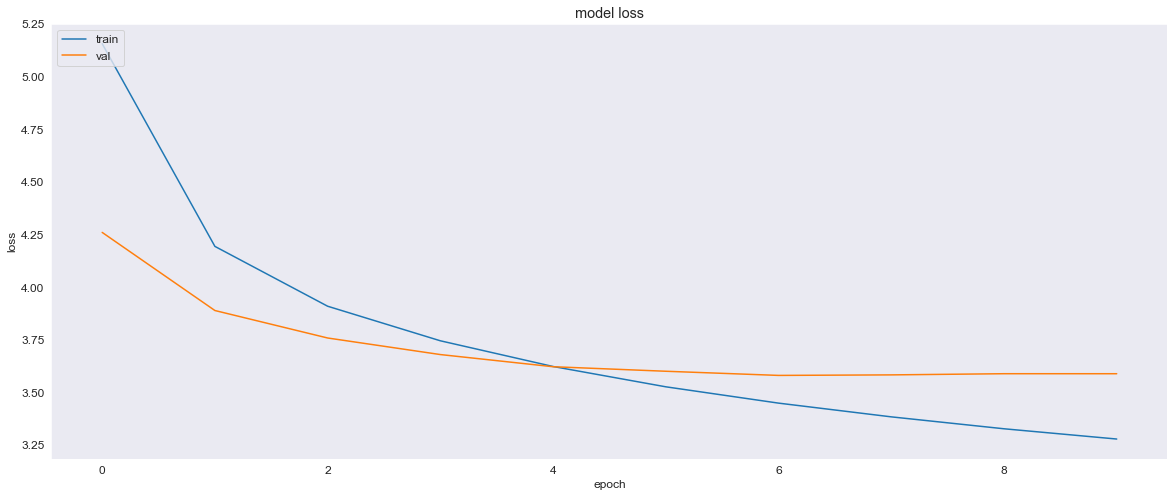

In [57]:
# Create a plot to visualize the training and validation loss over epochs
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [58]:
# This function converts an integer index to a word using the provided tokenizer.
def idx_to_word(integer, tokenizer):
    # Iterate through the word-to-index mapping in the tokenizer.
    for word, index in tokenizer.word_index.items():
        # If the index matches the given integer, return the corresponding word.
        if index == integer:
            return word
    # If no match is found, return None.
    return None


In [59]:
# This function generates a caption for an image using the provided model, tokenizer, and features.
def predict_caption(model, image, tokenizer, max_length, features):
    # Extract image features for the given image.
    feature = features[image]
    # Initialize the input text with the start token.
    in_text = "startseq"
    # Loop to generate a caption word by word up to the maximum length.
    for i in range(max_length):
        # Convert the input text to a sequence of integer tokens using the tokenizer.
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # Pad the sequence to the maximum length.
        sequence = pad_sequences([sequence], max_length)
        # Predict the next word in the caption using the model.
        y_pred = model.predict([feature, sequence])
        # Find the index of the word with the highest predicted probability.
        y_pred = np.argmax(y_pred)
        # Convert the index to the corresponding word.
        word = idx_to_word(y_pred, tokenizer)
        # If the word is not found, exit the loop.
        if word is None:
            break
        # Append the predicted word to the input text.
        in_text += " " + word
        # If the predicted word is the end token, exit the loop.
        if word == 'endseq':
            break
    # Return the generated caption.
    return in_text


In [60]:
# Select a random sample of 30 records from the 'test' DataFrame
samples = test.sample(30)

# Reset the index of the 'samples' DataFrame and modify it in place
samples.reset_index(drop=True, inplace=True)

In [61]:
# Iterate through each row (record) in the 'samples' DataFrame
for index, record in samples.iterrows():

    # Load an image file specified by the 'image' column of the current record
    img = load_img(os.path.join(image_path, record['image']), target_size=(224, 224))

    # Convert the loaded image to a NumPy array and normalize pixel values to the range [0, 1]
    img = img_to_array(img)
    img = img/255.

    # Generate a caption for the current image using the 'caption_model'
    caption = predict_caption(caption_model, record['image'], tokenizer, max_length, features)

    # Update the 'caption' column of the 'samples' DataFrame with the generated caption
    samples.loc[index, 'caption'] = caption

    # Return the 'in_text' variable, but this 'return' statement is not within a function or method, so it will cause an error



1/1 [==============================] - 0s 38ms/step


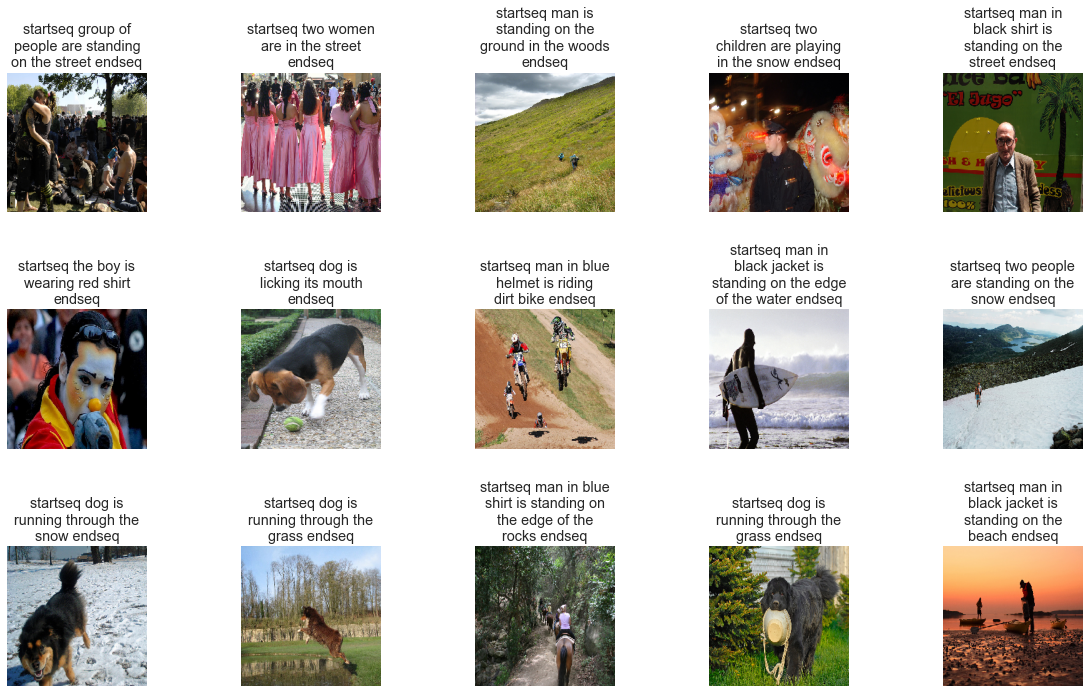

In [62]:
display_images(samples)